# Floresta de Caminhos Ótimos (Optimum-Path Forest)



# Exercícios:

#### Baixe o dataset Breast Tissue do repositório UCI.

#### 1. Separar em treinamento e teste e classificar as amostras de teste utilizando o OPF supervisionado. 


##### Abrindo dataset

In [211]:
# Para não ficar mostrando um monte de logs
import logging
logging.disable()

In [212]:
import pandas as pd
df = pd.read_excel("BreastTissue.xls",sheet_name='Data',index_col='Case #')

In [213]:
df

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Case #,,,,,,,,,,
1,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
2,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
3,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
4,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
5,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
...,...,...,...,...,...,...,...,...,...,...
102,adi,2000.000000,0.106989,0.105418,520.222649,40087.920984,77.059161,204.090347,478.517223,2088.648870
103,adi,2600.000000,0.200538,0.208043,1063.441427,174480.476218,164.071543,418.687286,977.552367,2664.583623
104,adi,1600.000000,0.071908,-0.066323,436.943603,12655.342135,28.963331,103.732704,432.129749,1475.371534


##### Separando características e labels

In [214]:
X = df.drop(columns=["Class"])
X = X.values

In [215]:
y = df['Class']
y = y.values

##### Normalizando os dados

In [216]:
from sklearn.preprocessing import StandardScaler
# Instancia o StandardScaler
normalizacao_std = StandardScaler()
# Analisa os dados e prepara o padronizador
dado_std = normalizacao_std.fit(X)
# Transforma os dados
X_std = normalizacao_std.transform(X)


##### Dividindo os dados em treinamento e teste

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_std, y, test_size=0.33,
                                                random_state=42)

In [218]:
print(X_train.shape)
print(Y_train.shape)

(71, 9)
(71,)


In [219]:
print(X_test.shape)
print(Y_test.shape)

(35, 9)
(35,)


##### Utilizando LabelEnconder para codificar as labels com valores entre 0 e n_classes-1.

In [220]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_test = label_encoder.fit_transform(Y_test)
Y_train = label_encoder.fit_transform(Y_train)

##### Treinamento e predição do modelo

In [221]:
%matplotlib inline
import numpy as np

# Importando o OPF supervisionado para classificação
from opfython.models.supervised import SupervisedOPF

In [222]:
# Cria uma instancia do OPF supervisionado
opf = SupervisedOPF()

# Ajusta o classificador considerando o conjunto de treinamento
opf.fit(X_train, Y_train)

# Predição no conjunto de testes
preds = opf.predict(X_test)

##### Resultados

In [223]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8
           2       1.00      0.83      0.91         6
           3       0.57      0.80      0.67         5
           4       0.67      0.80      0.73         5
           5       0.50      0.33      0.40         6

    accuracy                           0.80        35
   macro avg       0.79      0.79      0.78        35
weighted avg       0.81      0.80      0.79        35



In [224]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, preds)

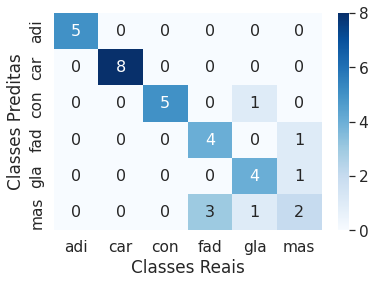

In [225]:
# usando as configurações padrões do seaborn para plotagem
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,annot_kws={"size": 16}, cmap=plt.cm.Blues,
            xticklabels=label_encoder.inverse_transform(np.unique(Y_test)),
            yticklabels=label_encoder.inverse_transform(np.unique(preds)),)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

#### 2. Agrupar os dados utilizando o OPF-não supervisionado e propagar o rótulo considerando um conjunto de treinamento. Classificar as amostras de teste considerando os rótulos propagados.

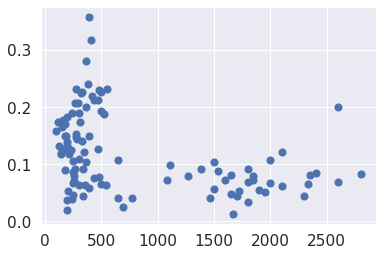

In [262]:
plt.scatter(X[:, 0], X[:, 1], s=50);

In [237]:
import opfython.math.general as g
import opfython.stream.parser as p
from opfython.models import UnsupervisedOPF

In [238]:
# Cria uma instância do opf não supervisionado
opf = UnsupervisedOPF(
    min_k=1, max_k=20)

In [249]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)
#y = label_encoder.fit_transform(y)

In [263]:
# Ajusta o modelo aos dados
opf.fit(X_train, Y_train)

In [264]:
# Se os dados estiverem rotulados, propaga o rótulo real de cada protótipo para todas as amostras por ele
#   conquistadas
opf.propagate_labels()

In [265]:
# faz a estimativa dos rótulos baseado no agrupamento
preds, clusters = opf.predict(X_test)


print('Número de agrupamentos = ',len(np.unique(clusters)))

Número de agrupamentos =  2


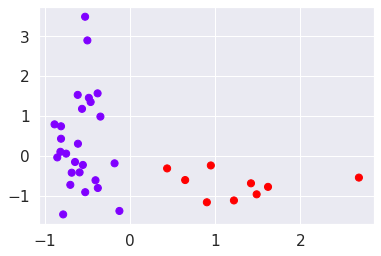

In [267]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=clusters, s=50, cmap='rainbow')

In [268]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.19      1.00      0.32         5
           5       0.00      0.00      0.00         6

    accuracy                           0.29        35
   macro avg       0.12      0.33      0.17        35
weighted avg       0.11      0.29      0.15        35



/home/igornieto/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igornieto/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igornieto/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)